## Exploration_05. 나랑 닮은 연예인은 누구?

### Step1. 사진 모으기
- 아지트에 공유된 사진 폴더사용
- 개인사진은 원래 있던 사진과 오늘 촬영한 사진 사용 (총 3장)


file_list: ['슈퍼비.jpeg', '문재인.jpeg', '이민호.jpeg', '하정우.jpg', '유지태.jpg', '비니.jpg', '신동엽.jpg', '지호.jpg', '도지한.jpg', '윤경신.jpg', '제프리 힌턴.jpg', '유아.jpg', '황병국.jpg', '스윙스.jpeg', '개코.jpeg', '마동석.jpeg', '첸.jpg', '박정민.jpg', '리암 니슨.png', '무라니시.png', '장원준.jpeg', '이대호.jpeg', '송중기.jpeg', '트와이스미나.jpg', '지디.jpg', '권태원.jpeg', '고창석.jpeg', '심수창.jpeg', '백현.jpg', '씨잼.jpg', '제니.jpg', '도아.jpeg', '우기.jpg', '최양락.jpg', '아이즈원김채원.jpg', '류준열.jpg', '이성민.jpg', '리사.jpg', '시우민.jpg', '방시혁.jpeg', '공유.jpg', '박진영.jpeg', '박보검.jpg', '티모시 달튼.jpeg', '강미나.jpg', '여자아이들수진.jpeg', '대도서관.jpeg', '전소미.jpg', '온앤오프라운.jpg', '김윤석.jpeg', '찬열.jpeg', '철면수심.jpg', '장재성-1.jpg', '박나래.jpeg', '최무성.jpg', '강민경.jpg', '트와이스정연.jpg', '권현빈.jpg', '봉준호.jpg', '류진.jpg', '톰 홀랜드.jpg', '유희열.jpeg', '트와이스사나.jpg', '하승진.jpg', '정우성.jpeg', '벤 에플렉.jpeg', '케빈 스페이시.jpeg', '이안 굿펠로우.jpg', '채연.jpg', '이광수.jpg', '유재석.jpg', '뷔.png', '성룡.jpg', '이범수.jpeg', '카이.jpg', '손흥민.jpg', '김종서.jpg', '레드벨벳웬디.jpg', 'obama.jpg', '아이즈원민주.jpg', '김남주.jpeg', 'trump.jpg', '한석규.jpg', '최준석.jpg', '이승

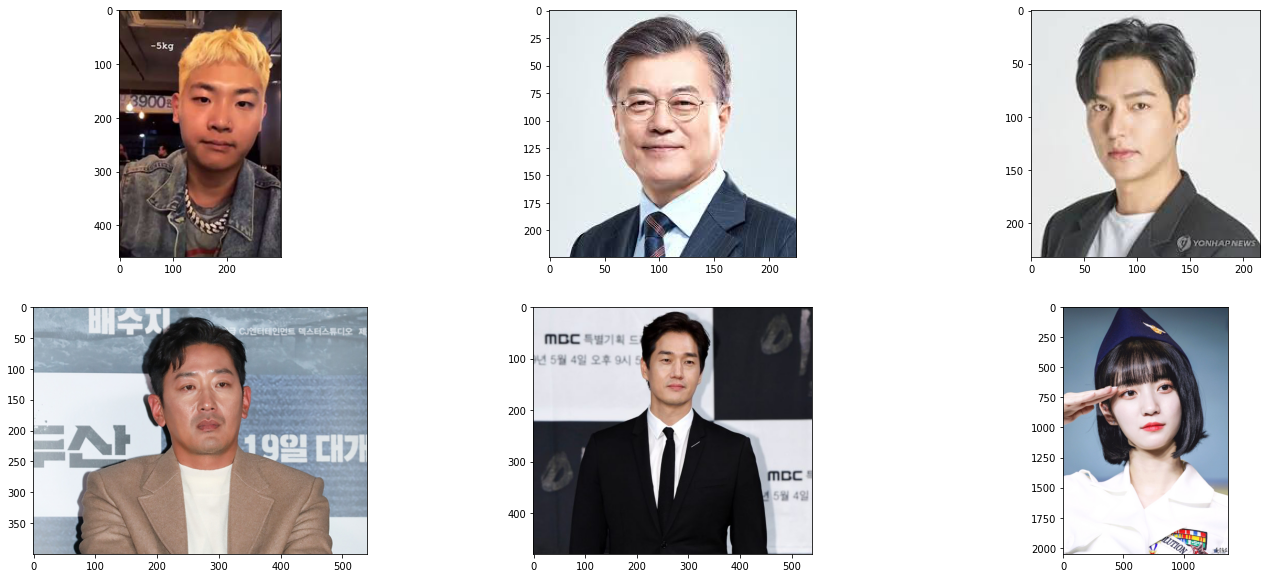

In [2]:
import os

# 폴더내 사진을 가져와 이름 출력
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()): # flatten(): 다차원 배열을 1차원으로 만들어 줌
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

* 비교용으로 다양한 사진들을 업로드 해 둔 상태이다

### Step2. 얼굴 영역 자르기

[(504, 632, 889, 247)]


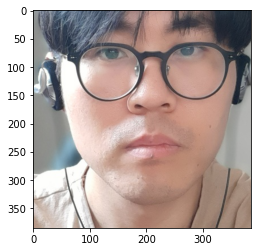

In [3]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

# 내 사진 로드
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/장재성-3.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 얼굴 영역의 좌표를 출력

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:] # 좌표에 따라 얼굴 영역 추출

plt.imshow(cropped_face);   # 출력 된 이미지 확인

* 본인의 사진 중 하나를 선택해서 얼굴 영역에 대한 좌표를 얻었다.
* 그 다음 그 좌표에 해당하는 부분을 crop 하여 따로 저장한 뒤 출력으로 확인 해 보았다.

In [4]:
import face_recognition
import os
from PIL import Image
import numpy as np
from pathlib import Path  # 파일이름 추출용


def get_cropped_face(image_file):
    # Cropped_face 이미지 저장 경로
    path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/cropped_face/'+Path(image_file).stem+'.jpg'
    
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    pillow_image = Image.fromarray(cropped_face) # cropped_face 를 numpy array에서 image형태로 변환
    pillow_image.save(path_to_save) # 변환된 이미지 파일을 지정 경로에 저장
    
    return cropped_face

* jupyter 상에 새로운 폴더(cropped_face)를 만들어 두었다.
* 각 cropped_face 의 정보를 Image.fromarray() 를 이용해 image로 변환한 뒤 image.save()를 이용해 각 파일명으로 새로만든 폴더에 저장 하였다.
* 아래 사진을 통해 cropped_face 폴더에 정상적으로 저장 되어있는 것을 확인할 수 있으며, b1a4진영.jpg를 예로 확인해보면 아래 사진처럼 원하는대로 얼굴만 cropped 되어 저장 된 것을 알 수 있다.

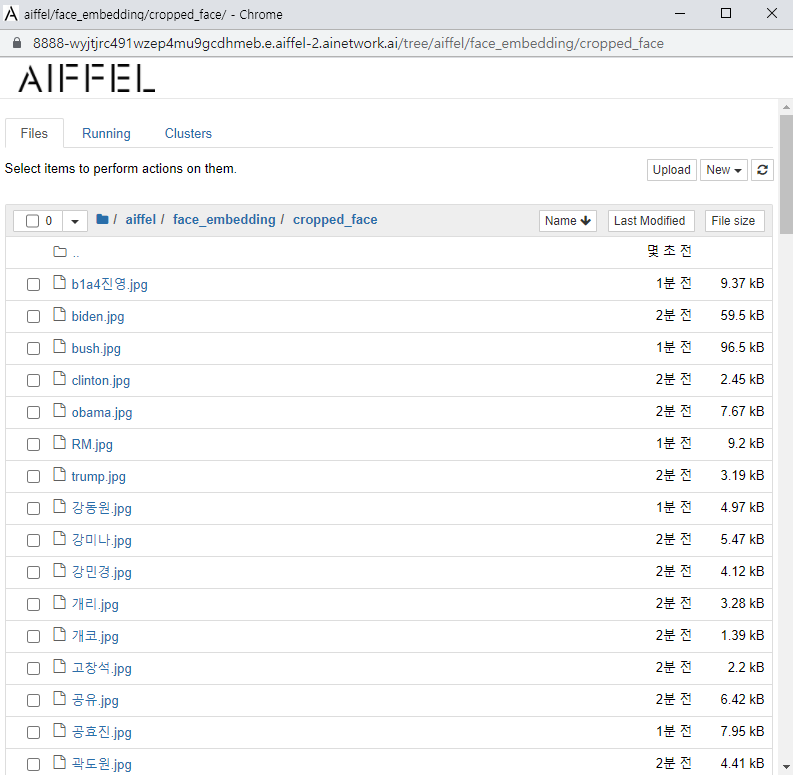

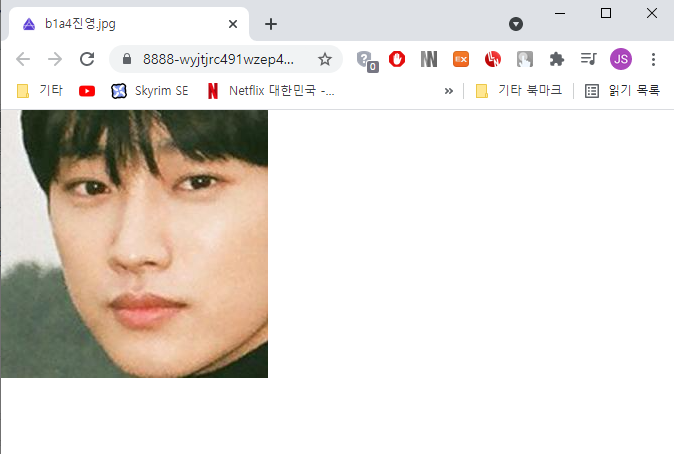

### Step3. 얼굴 영역의 임베딩 추출하기

In [5]:
# 이미지 embedding 추출
image_file = os.path.join(dir_path, '장재성-3.jpg') # 내 이미지 가져오기
face = get_cropped_face(image_file)   # 얼굴 영역 추출을 위한 함수 호출

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# 추출된 얼굴영역을 이용한 embedding 결과 확인
embedding = get_face_embedding(face)
embedding

[array([-0.05678475,  0.1151118 ,  0.0422252 ,  0.0215327 , -0.10796359,
        -0.00876503, -0.06812561, -0.11250886,  0.12545651, -0.06709716,
         0.20954652, -0.10634066, -0.26003423, -0.0252241 , -0.03710187,
         0.13692431, -0.13365743, -0.08002692, -0.08513717,  0.00042579,
         0.0063623 ,  0.0115352 ,  0.03353409,  0.05508722, -0.04710076,
        -0.38999751, -0.08977441, -0.14791659,  0.00991164, -0.0621629 ,
        -0.08322871,  0.04897248, -0.16750863, -0.05505248,  0.03228563,
         0.01694226, -0.07244124, -0.02098428,  0.23014191, -0.05355822,
        -0.20317906,  0.0350214 ,  0.02883023,  0.24295124,  0.17734282,
         0.05947777,  0.030717  , -0.1621429 ,  0.02746839, -0.15071118,
         0.04934113,  0.21235284,  0.05068707,  0.09044299,  0.00230764,
        -0.15697083,  0.00890788,  0.07877868, -0.13592878,  0.04256345,
         0.10657132, -0.0638334 , -0.04346498, -0.04926672,  0.29299393,
         0.06507115, -0.13797531, -0.13734053,  0.0

* 이미지들 중에 본인의 사진을 가져완뒤 얼굴영역을 추출한다.
* face_encodings() 함수를 이용해 추출 된 얼굴 영역에 해당하는 embedding 값을 얻는다.
* 출력을 통해 결과를 확인했다.

In [6]:
# 각 얼굴이미지들의 embedding 값을 dictionary 형태로 저장
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

* 본인의 사진을 이용해 embedding 값을 구한 것 처럼, 폴더안에 존재하는 모든 이미지들에 대해 embedding 값을 구하여 dictionary 형태로 저장한다.

In [7]:
# embedding 정보가 저장된 dictionary 확인용 출력
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['장재성-3']

array([-0.05678475,  0.1151118 ,  0.0422252 ,  0.0215327 , -0.10796359,
       -0.00876503, -0.06812561, -0.11250886,  0.12545651, -0.06709716,
        0.20954652, -0.10634066, -0.26003423, -0.0252241 , -0.03710187,
        0.13692431, -0.13365743, -0.08002692, -0.08513717,  0.00042579,
        0.0063623 ,  0.0115352 ,  0.03353409,  0.05508722, -0.04710076,
       -0.38999751, -0.08977441, -0.14791659,  0.00991164, -0.0621629 ,
       -0.08322871,  0.04897248, -0.16750863, -0.05505248,  0.03228563,
        0.01694226, -0.07244124, -0.02098428,  0.23014191, -0.05355822,
       -0.20317906,  0.0350214 ,  0.02883023,  0.24295124,  0.17734282,
        0.05947777,  0.030717  , -0.1621429 ,  0.02746839, -0.15071118,
        0.04934113,  0.21235284,  0.05068707,  0.09044299,  0.00230764,
       -0.15697083,  0.00890788,  0.07877868, -0.13592878,  0.04256345,
        0.10657132, -0.0638334 , -0.04346498, -0.04926672,  0.29299393,
        0.06507115, -0.13797531, -0.13734053,  0.09588398, -0.16

* embedding 값을 저장 해 둔 dictionary 에서 다시 본인의 정보를 불러와 정상적으로 저장 되어있는지 확인했다.

### Step4. 모든 연예인들과 비교하기

In [8]:
import numpy as np

# 본인 첫번째 사진
A = np.array(embedding_dict['장재성-3'])

# 본인 두번째 사진
B = np.array(embedding_dict['장재성-1'])

# 다른 사람 사진
C = np.array(embedding_dict['톰 홀랜드'])

In [9]:
# A와 C, B와 C 사이의 거리 계산
distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 0.8184354213656371
Distance between B and C: 0.8815110607333615


* A, B 에 np.array()의 형태로 본인의 사진에 해당하는 embedding 값들을 가져오고 C 에는 비교를 위한 다른 사진을 가져온다.
* 그 뒤 A와 C, B와 C 사이의 거리 값의 차이를 비교하여 어느정도의 유사성을 가지는지 확인해 봤다.
* 값이 낮을 수록 유사성이 높은 것으로 해석 할 수 있다.

In [10]:
# 두 이미지 사이의 거리계산용 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# 본인 사진간의 거리 비교
print(get_distance('장재성-1', '장재성-2'))
print(get_distance('장재성-1', '장재성-3'))
print(get_distance('장재성-2', '장재성-3'))

0.29780341141835537
0.40753381304460184
0.3925142870413679


* 본인의 사진 총 3장의 embedding 값을 서로서로 비교하여 어느정도의 유사성을 가지는지 확인해 보았다. 
* '장재성-1'이 예전 사진이고, '장재성-2'가 2~3년전 사진이고, '장재성-3'이 오늘 촬영한 사진이다.
* 따라서 시간이 흘렀음에 따라 같은 사람이라도 embedding 거리값의 비교 결과에 조금은 차이가 나는 것 으로 생각 된다.

In [11]:
# name1과 name2사이의 거리를 구하는 함수
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 지정한 본인 사진과 다른 모든 사진과의 embedding 거리 값 비교
sort_key_func = get_sort_key_func('장재성-3')  # name1

* name1, name2 사이의 거리를 구하는 함수를 작성하고 본인의 사진을 name1에 해당하는 인자로 넘겨준다.
* 즉, name1 값은 고정으로 두고 뒤이은 코드에서 name2 값을 넘겨받아 둘을 비교하는 방식으로 진행 된다.

In [12]:
# embedding 거리 값이 가장 가까운 순서대로 top 5 선별 및 출력 확인
def get_nearest_face(name, top=5):
    
    # get_distance_from_name1 함수를 리턴 받음
    sort_key_func = get_sort_key_func(name) 
    
    # embedding_dict에서 이름을 하나씩 가져와서 nget_distance_from_name1의 name2인자로 전달
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0])) 
    
    # 결과값 출력
    for i in range(top+1):
        if i==0: # 비교에 사용되는 본인사진은 pass
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

* get_sort_key_func(name)에서 입력받은 name값을 name1로 넘겨주고 get_distance_from_name1 함수를 리턴 받는다.
* 이어서 비교에 필요한 name2 값을 넘겨줘야하는데 embedding_dict 내의 각 이미지의 이름 정보를 lambda 함수의 sort_key_func(get_distance_from_name1을 가지는)을 이용해 name2를 넘겨주고 기존의 name1과 distance를 비교한 뒤 결과 값을 리턴 받는다.
* 그 결과값을 sorted 한 상태로 sorted_faces에 대입하고 이를 이용해 순위, 이름, 거리에 대한 정보를 출력한다.

In [13]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('장재성-3',
  array([-0.05678475,  0.1151118 ,  0.0422252 ,  0.0215327 , -0.10796359,
         -0.00876503, -0.06812561, -0.11250886,  0.12545651, -0.06709716,
          0.20954652, -0.10634066, -0.26003423, -0.0252241 , -0.03710187,
          0.13692431, -0.13365743, -0.08002692, -0.08513717,  0.00042579,
          0.0063623 ,  0.0115352 ,  0.03353409,  0.05508722, -0.04710076,
         -0.38999751, -0.08977441, -0.14791659,  0.00991164, -0.0621629 ,
         -0.08322871,  0.04897248, -0.16750863, -0.05505248,  0.03228563,
          0.01694226, -0.07244124, -0.02098428,  0.23014191, -0.05355822,
         -0.20317906,  0.0350214 ,  0.02883023,  0.24295124,  0.17734282,
          0.05947777,  0.030717  , -0.1621429 ,  0.02746839, -0.15071118,
          0.04934113,  0.21235284,  0.05068707,  0.09044299,  0.00230764,
         -0.15697083,  0.00890788,  0.07877868, -0.13592878,  0.04256345,
          0.10657132, -0.0638334 , -0.04346498, -0.04926672,  0.29299393,
          0.06507115, -0.13

* 모든 이미지에 대해 distance가 낮은 순서대로 정렬을 했을 때의 결과이다.
* 즉, 순서대로 비슷한 이미지라는 결과를 나타내며 첫번째는 당연히 비교에 사용한 본인의 사진이 될것이다.

In [14]:
# 나와 가장 닮은 사람은 누굴까요?
get_nearest_face('장재성-3')

순위 1 : 이름(장재성-2), 거리(0.3925142870413679)
순위 2 : 이름(장재성-1), 거리(0.40753381304460184)
순위 3 : 이름(윤도현), 거리(0.47065015459785936)
순위 4 : 이름(슈퍼비), 거리(0.5070831357937067)
순위 5 : 이름(신동엽), 거리(0.5115972102264695)


In [15]:
# 나와 가장 닮은 사람은 누굴까요?
get_nearest_face('장재성-2')

순위 1 : 이름(장재성-1), 거리(0.29780341141835537)
순위 2 : 이름(장재성-3), 거리(0.3925142870413679)
순위 3 : 이름(윤도현), 거리(0.40056810056742714)
순위 4 : 이름(안재홍), 거리(0.4377115114723538)
순위 5 : 이름(박성호), 거리(0.4564982376101761)


In [16]:
# 나와 가장 닮은 사람은 누굴까요?
get_nearest_face('장재성-1')

순위 1 : 이름(장재성-2), 거리(0.29780341141835537)
순위 2 : 이름(장재성-3), 거리(0.40753381304460184)
순위 3 : 이름(윤도현), 거리(0.4754244577612302)
순위 4 : 이름(안재홍), 거리(0.4786829117028434)
순위 5 : 이름(이진호), 거리(0.48882321153724634)


* 사용된 본인의 사진 3장에 대한 각각의 결과를 출력해 보았다.
* 1, 2위는 비교에 사용된 본인의 사진 외의 두장이 차례대로 출력되었고 따라서 이는 어느정도 신빙성이 있는 결과라고 할 수 있다.
* 몇년 전 사진인 '장재성-2' 사진을 사용했을 때가 가장 본인의 사진과의 유사성이 높았고 연예인과의 유사성 또한 상대적으로 높게 나타났다.
* 서로 다른 세장의 본인 사진을 사용했음에도 가장 비슷한 사람으로 모두 '윤도현'이 나와서 조금 신기했다. 

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 본인사진 2장, 가장 비슷한사진 1장, 외국인 1장, 이성 1장 비교
A = np.array(embedding_dict['장재성-3'])
B = np.array(embedding_dict['장재성-2'])
C = np.array(embedding_dict['윤도현'])  # 가장 비슷하다고 판단된 이미지
D = np.array(embedding_dict['톰 홀랜드'])    # 시각화를 위한 비교용 (외국인)
E = np.array(embedding_dict['로제'])    # 시각화를 위한 비교용 (성별이 다른 사람)

data_ = {'장재성-3': A, '장재성-2': B, '윤도현': C, '톰 홀랜드': D, '로제': E}

# 시각화를 위한 전처리
df = pd.DataFrame(data_)
 # Distance에 따라 구분하기 위해 구간을 만든다.
df['Distance'] = pd.cut(df['장재성-3'], bins = np.linspace(-1, 1, num=20))
 # 구분된 각 그룹에 속하는 값들의 평균을 구한다
df_group = df.groupby('Distance').mean()
df_group

,장재성-3,장재성-2,윤도현,톰 홀랜드,로제
Distance,,,,,
"(-1.0, -0.895]",NaN,NaN,NaN,NaN,NaN
"(-0.895, -0.789]",NaN,NaN,NaN,NaN,NaN
"(-0.789, -0.684]",NaN,NaN,NaN,NaN,NaN
"(-0.684, -0.579]",NaN,NaN,NaN,NaN,NaN
"(-0.579, -0.474]",NaN,NaN,NaN,NaN,NaN
"(-0.474, -0.368]",-0.389998,-0.380520,-0.292105,-0.278563,-0.279860
"(-0.368, -0.263]",-0.275000,-0.225377,-0.226418,-0.250033,-0.212838
"(-0.263, -0.158]",-0.206874,-0.180323,-0.178884,-0.166252,-0.195336
"(-0.158, -0.0526]",-0.096784,-0.095675,-0.089715,-0.097878,-0.081768


* linspace를 통해 구간을 나누고 각 구간에 속하는 값들을 그룹으로 묶은 뒤 평균을 구한다.
* 값들이 모두 소수점 이하이기 때문에 20구간으로 잘게 나눴다.

In [41]:
df_group.dropna(inplace=True) # 각 구간의 nan 값들을 제거
df_group = round(df_group*100, 2) # Diatance 값이 너무 작기 때문에 곱 처리 및 반올림 처리를 함
df_group.reset_index(inplace=True) # 인덱스를 ''distance'에서 '숫자' 값으로 재 설정
df_group

,Distance,장재성-3,장재성-2,윤도현,톰 홀랜드,로제
0,"(-0.474, -0.368]",-39.00,-38.05,-29.21,-27.86,-27.99
1,"(-0.368, -0.263]",-27.50,-22.54,-22.64,-25.00,-21.28
2,"(-0.263, -0.158]",-20.69,-18.03,-17.89,-16.63,-19.53
3,"(-0.158, -0.0526]",-9.68,-9.57,-8.97,-9.79,-8.18
4,"(-0.0526, 0.0526]",0.40,0.81,0.18,-0.15,0.01
5,"(0.0526, 0.158]",10.14,10.28,9.29,10.60,10.96
6,"(0.158, 0.263]",20.63,17.90,15.97,20.63,16.03
7,"(0.263, 0.368]",28.46,24.40,24.69,24.16,20.10
8,"(0.368, 0.474]",40.87,40.98,38.21,32.15,30.65


* 불필요한 Nan 값들을 drop하고 각 값에 곱하기 100, round() 처리를 하여 소수점 이하 2자리로 모두 재설정한다.
* 기존에 distance가 index로 표기 되어있던 것을 바꾸기 위해 0~8까지의 숫자로 다시 index를 설정해 주었다.

In [42]:
# index를 distance에서 숫자로 바꿨기 때문에 기존의 distance를 제거
df_group.drop('Distance', axis=1, inplace=True)
# 한글 label을 영문으로 변경
df_group.rename(columns={'장재성-3': 'JS-3', '장재성-2': 'JS-2', '윤도현': 'YB', '톰 홀랜드': 'TH', '로제': 'Rose'}, inplace=True)
df_group

,JS-3,JS-2,YB,TH,Rose
0,-39.00,-38.05,-29.21,-27.86,-27.99
1,-27.50,-22.54,-22.64,-25.00,-21.28
2,-20.69,-18.03,-17.89,-16.63,-19.53
3,-9.68,-9.57,-8.97,-9.79,-8.18
4,0.40,0.81,0.18,-0.15,0.01
5,10.14,10.28,9.29,10.60,10.96
6,20.63,17.90,15.97,20.63,16.03
7,28.46,24.40,24.69,24.16,20.10
8,40.87,40.98,38.21,32.15,30.65


* 불필요한 distance column을 drop하고 간략한 표기를 위해 column의 이름을 영문으로 변경해 주었다.
* 전체적으로 정리하자면, (128,) 형태를 바로 시각화 하기는 힘들기 때문에 distance 값들을 linspace를 이용해 -1, 1 사이의 값으로 20구간으로 나누었다.
* 각 구간에 포함되는 값들의 평균을 구한뒤 *100, round() 처리를 통해 최종적으로 소수점 두자리의 형태로 만들었다.
* 마지막으로 index와 label 명을 변경 시킨뒤 출력해 보았다.

### Step5. 시각화

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

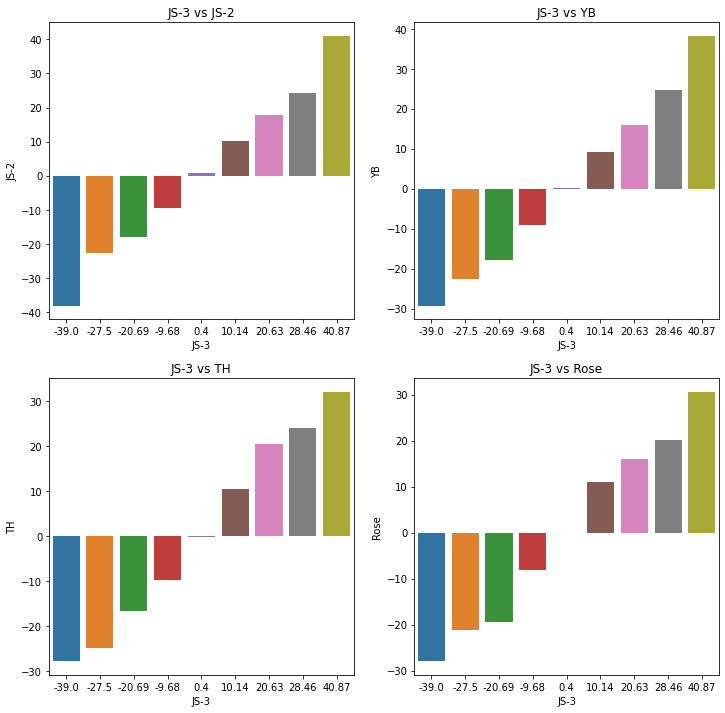

In [18]:
f,ax=plt.subplots(2,2,figsize=(12,12))
sns.barplot('JS-3','JS-2',data=df_group,ax=ax[0, 0])
ax[0, 0].set_title('JS-3 vs JS-2')
sns.barplot('JS-3','YB',data=df_group,ax=ax[0, 1])
ax[0, 1].set_title('JS-3 vs YB')
sns.barplot('JS-3','TH',data=df_group,ax=ax[1, 0])
ax[1, 0].set_title('JS-3 vs TH')
sns.barplot('JS-3','Rose',data=df_group,ax=ax[1, 1])
ax[1, 1].set_title('JS-3 vs Rose')
plt.show()

* 먼저 (2, 2) 좌표에 barplot으로 JS-3 vs JS-2, YB, TH, Rose 를 각각 비교해 보고자 하였다
* 좌우 그래프 값이 대칭이 될 수록 비슷하다고 해석 할 수는 있지만 이런 형태의 barplot으로는 제대로 된 시각적인 비교가 되지 않기 때문에 다른 방법으로 다시 해볼 필요가 있었다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

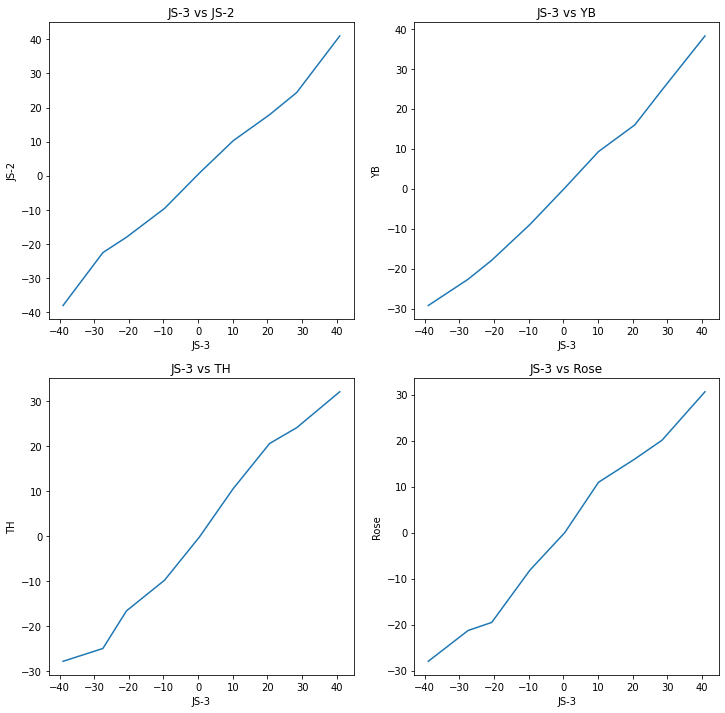

In [19]:
f,ax=plt.subplots(2,2,figsize=(12,12))
sns.lineplot('JS-3','JS-2',data=df_group,ax=ax[0, 0])
ax[0, 0].set_title('JS-3 vs JS-2')
sns.lineplot('JS-3','YB',data=df_group,ax=ax[0, 1])
ax[0, 1].set_title('JS-3 vs YB')
sns.lineplot('JS-3','TH',data=df_group,ax=ax[1, 0])
ax[1, 0].set_title('JS-3 vs TH')
sns.lineplot('JS-3','Rose',data=df_group,ax=ax[1, 1])
ax[1, 1].set_title('JS-3 vs Rose')
plt.show()

* 같은 방식으로 이번에는 lineplot()으로 재 비교를 해 보았다.
* 이미지가 비슷할 수록 직선에 가깝게 나타날 것이라고 생각하였다.
* JS-3 vs JS-2 (본인사진) 비교와 JS-3 vs YB (가장 비슷한 이미지)가 조금 더 직선에 가깝게 나타났고, JS-3 vs TH (외국인)이 좀 더 많은 굴곡을 나타냈으며, Js-3 vs Rose(이성) 이 가장 큰 굴곡을 보였다. 
* 완벽한 비교는 되지 않지만 어느정도 예상한 대로 차이가 나타나는 것은 확인 할 수 있었다.
* 모든 비교를 하나의 figure를 통해서 진행할 수 도 있지만 그럴 경우 명확하게 구분이 어려워 기준이 되는 사진에 대한 개별적인 비교를 통해 결과를 확인하였다.


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

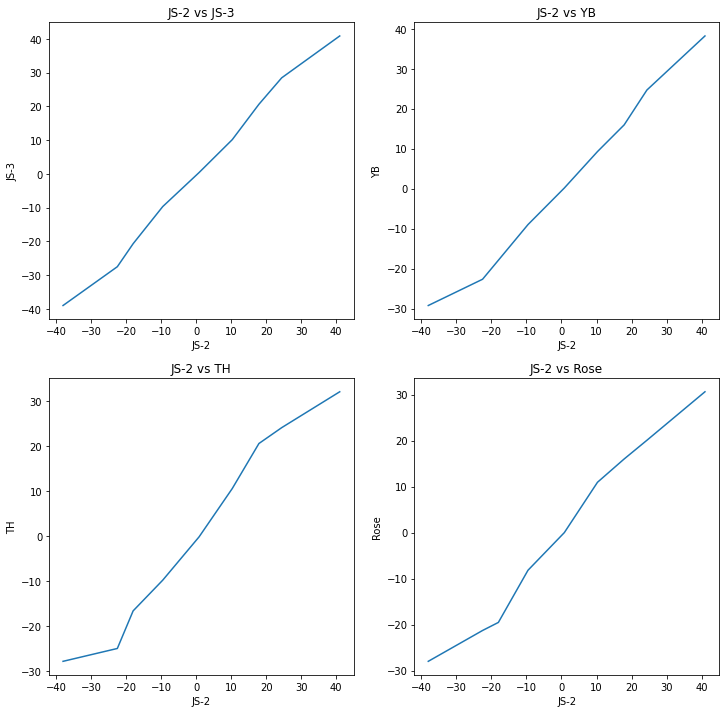

In [36]:
f,ax=plt.subplots(2,2,figsize=(12,12))
sns.lineplot('JS-2','JS-3',data=df_group,ax=ax[0, 0])
ax[0, 0].set_title('JS-2 vs JS-3')
sns.lineplot('JS-2','YB',data=df_group,ax=ax[0, 1])
ax[0, 1].set_title('JS-2 vs YB')
sns.lineplot('JS-2','TH',data=df_group,ax=ax[1, 0])
ax[1, 0].set_title('JS-2 vs TH')
sns.lineplot('JS-2','Rose',data=df_group,ax=ax[1, 1])
ax[1, 1].set_title('JS-2 vs Rose')
plt.show()

* 마찬가지의 방식으로 이번에는 JS-2 사진을 기준으로 출력해 본 결과 비슷한 양상의 결과를 확인할 수 있다.

<AxesSubplot:>

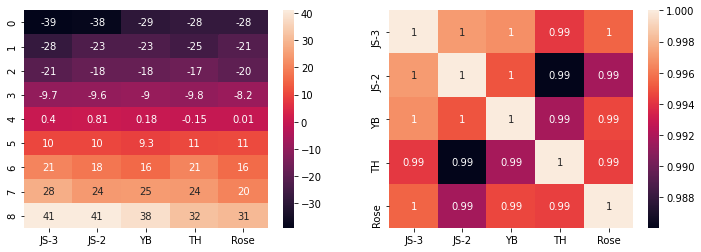

In [34]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(df_group, annot=True, ax=ax[0])
sns.heatmap(df_group.corr(), annot=True, ax=ax[1])

* heatmap을 통해 조금 더 쉽게 비교가 가능하도록 구현해 볼 수 있다.
* 왼쪽의 경우 색깔이 비슷할 수록 비슷한 score를 가지며 score가 비슷할 수록 유사성이 높다고 할 수 있다.
* 전체적으로 보면 JS-3과 JS-2가 상당히 비슷하고 JS-2와 YB(윤도현)가 마찬가지로 상당히 유사한 것을 알 수 있다. 특히 JS-2를 기준으로 봤을 때 JS-3과 비교했을 때의 수치와 YB와 비교했을 때의 수치가 크게 다르지 않음을 알 수 있는데 이는 위에서 미리 확인한 distance 비교 수치와도 유사한 결과라고 할 수 있다.
* 오른쪽 heatmap의 경우에는 각 사진들 간의 correlation 수치를 나타낸 것으로써, 마찬가지로 JS-3, JS-2, YB 간의 유사성을 보인다고 할 수 있다. 반면에 TH(외국인), Rose(다른 성별)과는 유사성이 적음을 색깔을 통해 확인할 수 있다.

## 회고
* Exploration_03 스티커앱 만들기에 이어 두번째로 진행한 얼굴인식 관련 프로젝트였기에 조금은 익숙한 느낌이 들었다.
* 본인의 사진 끼리 비교를 했을 때에도 생각보다 distnace간의 오차가 크다는 것을 알 수 있었다. 아마 비교에 사용된 사진의 얼굴크기 및 표정 등의 요소들이 어느정도 영향을 주지 않을까 생각해 보았다. 
* 일단 각 이미지의 distance 정보가 저장된 embedding_dict{} 에서 비교에 필요한 이미지들의 정보를 가져온 뒤에 몇가지 plot의 형태로 각각을 비교해 보았다. barplot의 경우 한눈에 알아보기가 힘들었기에 적합하지 않았지만, lineplot의 경우에는 barplot보다는 좀 더 쉽게 구분이 가능한 형태를 보였다.
* 이러한 결과들은 heatmap을 통해 구현했을 때 좀 더 명확하게 확인할 수 있었으며 특히 correalation 관계를 보면 색깔로서 그 관계성을 명확히 판단할 수 있었다.
* 이 외에도 다양한 형태의 시각화 방법들이 가능 할 것이라 생각되지만, 아직 그 모든것을 스스로 구현하기에는 무리가 있다고 판단하였다. 여러개의 columns를 가지는 dataframe의 경우 column끼리의 비교를 시각화 하기가 훨씬 수월한데 반해 이런식의 단일 데이터의 경우에는 distance외의 정보가 없기 때문에 뭔가 비교하여 시각화한다는 것이 생각보다 어려운 작업이었다. 조금더 이와 비슷한 예제들을 접하며 이런 형태의 데이터를 처리하는 방법들을 공부해볼 필요가 있다고 생각한다.